# Thompson Sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Loading

In [2]:
PATH = "../../../Reinforcement_Learning/Thompson_Sampling/Python/Ads_CTR_Optimisation.csv"

In [3]:
dataset = pd.read_csv(PATH)

## Thompson Sampling Algorithm

In [4]:
N = len(dataset)
ads = len(dataset.columns)
ads_selected = []
rewards_1 = [0] * ads
rewards_0 = [0] * ads
total_reward = 0

In [5]:
import random
for n in range(N):
    ad = 0
    max_random = 0
    for i in range(ads):
        random_beta = random.betavariate(rewards_1[i] + 1, rewards_0[i] + 1)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n][ad]
    if (reward == 1):
        rewards_1[ad] += 1
    else:
        rewards_0[ad] += 1
    total_reward += reward

## Visualisation

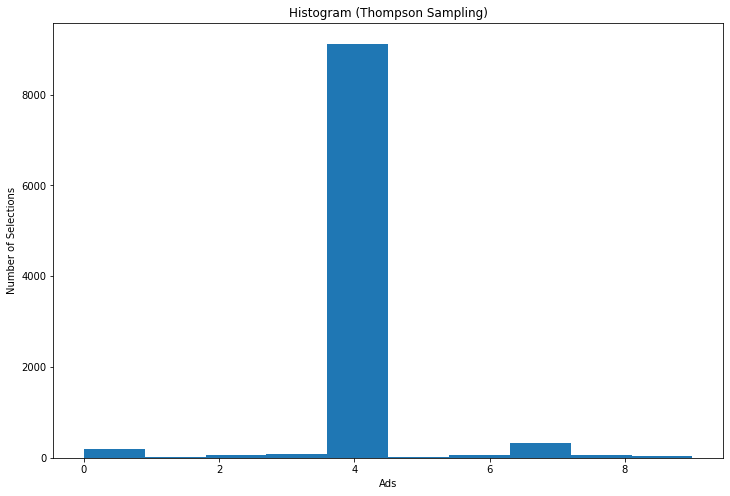

In [6]:
plt.figure(figsize=(12, 8))
plt.hist(ads_selected)
plt.title("Histogram (Thompson Sampling)")
plt.xlabel("Ads")
plt.ylabel("Number of Selections")
plt.show()